In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [12]:
import kagglehub
kagglehub.dataset_download("thisisjibon/banglabeats3sec")

Using Colab cache for faster access to the 'banglabeats3sec' dataset.


'/kaggle/input/banglabeats3sec'

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/MyDrive/hybrid_dataset/hybrid_en_bn_3sec_30000_manifest.csv")

In [5]:
df.head()

,song_id,clip_idx,abs_t0,abs_t1,rel_t0,rel_t1,clip_path,language,source_dataset,genres,lyrics_text,lyrics_len,clip_uid,language_id,has_lyrics,word_count,char_count
0,8247bc1d70ba4c4a9a9ae8cad93480ff,6,48.0,51.0,18.0,21.0,/content/drive/MyDrive/dali_en_clips_3s/c3d765...,english,dali,Pop,i've searched for the perfect love all my life,46,dali::8247bc1d70ba4c4a9a9ae8cad93480ff::6,0,True,9,46
1,Adhunik__000167,2,6.0,9.0,6.0,9.0,/kaggle/input/banglabeats3sec/wavs3sec/Adhunik...,bengali,banglabeats,Adhunik,NaN,0,banglabeats::Adhunik__000167::2,1,False,0,0
2,Rock__000184,1,3.0,6.0,3.0,6.0,/kaggle/input/banglabeats3sec/wavs3sec/Rock/18...,bengali,banglabeats,Rock,NaN,0,banglabeats::Rock__000184::1,1,False,0,0
3,Folk__000014,2,6.0,9.0,6.0,9.0,/kaggle/input/banglabeats3sec/wavs3sec/Folk/14...,bengali,banglabeats,Folk,NaN,0,banglabeats::Folk__000014::2,1,False,0,0
4,743189d4a1cc4dadbb7312d3b17defaf,3,39.0,42.0,9.0,12.0,/content/drive/MyDrive/dali_en_clips_3s/c3d765...,english,dali,"Jazz,Pop",and children listen to hear sleigh bells in th...,53,dali::743189d4a1cc4dadbb7312d3b17defaf::3,0,True,10,53


In [6]:
print("Rows:", len(df))
print("Unique songs:", df["song_id"].nunique())
print("\nCounts by source:")
print(df["source_dataset"].value_counts())

print("\nCounts by language:")
print(df["language"].value_counts())

print("\nLyrics coverage by language:")
print(df.groupby("language")["has_lyrics"].mean().sort_values(ascending=False))

print("\nAverage clips per song (should be ~10):")
print(df.groupby(["source_dataset","song_id"]).size().groupby(level=0).describe())

Rows: 30000
Unique songs: 3000

Counts by source:
source_dataset
dali           15000
banglabeats    15000
Name: count, dtype: int64

Counts by language:
language
english    15000
bengali    15000
Name: count, dtype: int64

Lyrics coverage by language:
language
english    0.940133
bengali    0.288733
Name: has_lyrics, dtype: float64

Average clips per song (should be ~10):
                 count  mean  std   min   25%   50%   75%   max
source_dataset                                                 
banglabeats     1500.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0
dali            1500.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0


In [7]:
clip_nonempty = df.groupby(["language","clip_idx"])["has_lyrics"].mean().reset_index()
clip_nonempty_pivot = clip_nonempty.pivot(index="clip_idx", columns="language", values="has_lyrics")
clip_nonempty_pivot

language,bengali,english
clip_idx,,
0,0.334667,0.892667
1,0.341333,0.920000
2,0.321333,0.932000
3,0.310667,0.944667
4,0.300000,0.944667
5,0.288667,0.955333
6,0.276667,0.962667
7,0.264000,0.953333
8,0.239333,0.950667


In [8]:
def describe_cols(df, cols, group="language"):
    return df.groupby(group)[cols].describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

print(describe_cols(df, ["lyrics_len","word_count","char_count"], group="language"))

         lyrics_len                                                           \
              count       mean        std  min   10%   25%   50%   75%   90%   
language                                                                       
bengali     15000.0  14.620600  33.400375  0.0   0.0   0.0   0.0  15.0  52.0   
english     15000.0  39.660267  21.251604  0.0  14.0  25.0  38.0  54.0  68.0   

                 ... char_count                                               \
            max  ...      count       mean        std  min   10%   25%   50%   
language         ...                                                           
bengali   466.0  ...    15000.0  14.620600  33.400375  0.0   0.0   0.0   0.0   
english   159.0  ...    15000.0  39.660267  21.251604  0.0  14.0  25.0  38.0   

                             
           75%   90%    max  
language                     
bengali   15.0  52.0  466.0  
english   54.0  68.0  159.0  

[2 rows x 30 columns]


In [9]:
for lang in ["english","bengali"]:
    top = df[df["language"]==lang]["genres"].value_counts().head(15)
    print(f"\nTop 15 genres for {lang}:")
    print(top)


Top 15 genres for english:
genres
Pop                                                            4080
Rock                                                           2110
Pop,Rock                                                        960
Alternative                                                     870
Alternative,Pop Indé,Rock indé,Pop,Pop indé/Folk,Rock           610
Pop,Rock,Hard Rock,Metal                                        390
Alternative,Rock indé,Pop,Rock                                  280
Dance,Pop,Rock                                                  240
Pop,Rock,Metal                                                  230
Alternative,Rock                                                220
Country                                                         190
Dance                                                           190
Alternative,Rock indé,Pop,Pop indé/Folk,Rock                    180
Films/Jeux vidéo,Musiques de films                              160
Alternative,P

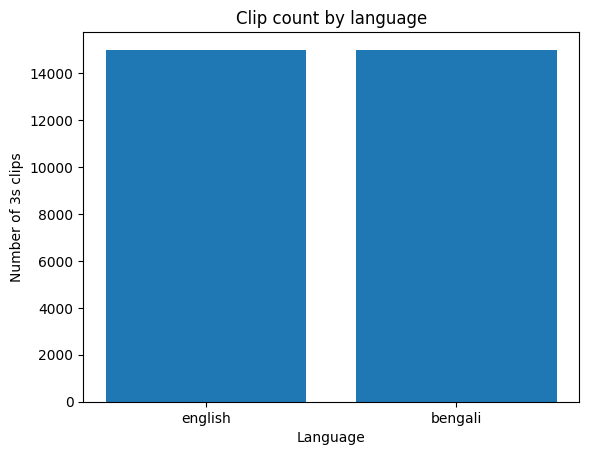

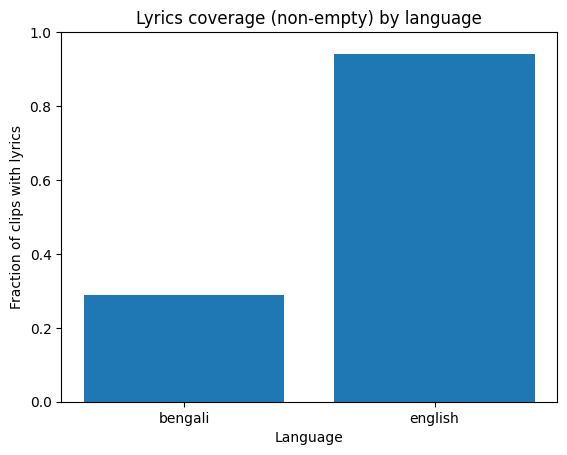

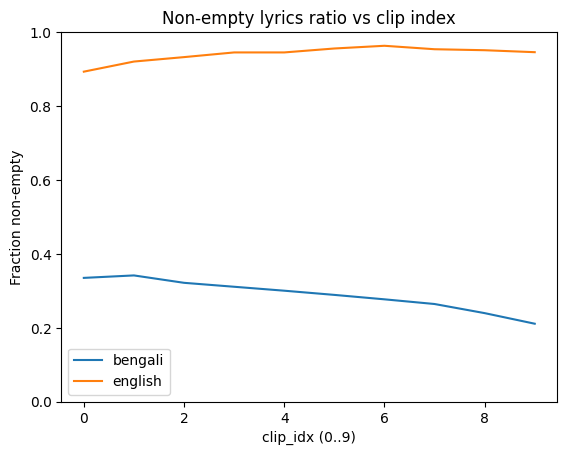

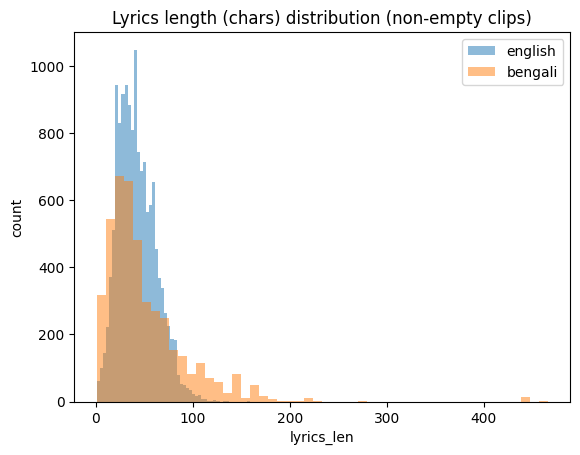

In [11]:
import matplotlib.pyplot as plt

# Plot 1: counts per language
counts = df["language"].value_counts()
plt.figure()
plt.bar(counts.index, counts.values)
plt.title("Clip count by language")
plt.xlabel("Language")
plt.ylabel("Number of 3s clips")
plt.show()

# Plot 2: lyrics coverage per language
coverage = df.groupby("language")["has_lyrics"].mean()
plt.figure()
plt.bar(coverage.index, coverage.values)
plt.title("Lyrics coverage (non-empty) by language")
plt.xlabel("Language")
plt.ylabel("Fraction of clips with lyrics")
plt.ylim(0, 1)
plt.show()

# Plot 3: non-empty lyrics by clip_idx
pivot = clip_nonempty_pivot.fillna(0.0)
plt.figure()
for col in pivot.columns:
    plt.plot(pivot.index, pivot[col].values, label=col)
plt.title("Non-empty lyrics ratio vs clip index")
plt.xlabel("clip_idx (0..9)")
plt.ylabel("Fraction non-empty")
plt.ylim(0, 1)
plt.legend()
plt.show()

# Plot 4: lyrics length histogram (chars) for each language (filter non-empty)
plt.figure()
for lang in ["english","bengali"]:
    vals = df[(df["language"]==lang) & (df["lyrics_len"]>0)]["lyrics_len"].values
    plt.hist(vals, bins=50, alpha=0.5, label=lang)
plt.title("Lyrics length (chars) distribution (non-empty clips)")
plt.xlabel("lyrics_len")
plt.ylabel("count")
plt.legend()
plt.show()


In [13]:
import random
import soundfile as sf
from pathlib import Path

def audio_sanity(df, n=200, seed=42):
    random.seed(seed)
    sample = df.sample(n=min(n, len(df)), random_state=seed)

    rows = []
    missing = 0
    for _, r in sample.iterrows():
        p = Path(str(r["clip_path"]))
        if not p.exists():
            missing += 1
            continue
        try:
            info = sf.info(str(p))
            dur = info.frames / info.samplerate if info.samplerate else np.nan
            rows.append({"sr": info.samplerate, "dur": dur, "path": str(p)})
        except Exception:
            pass

    aud = pd.DataFrame(rows)
    print("Checked:", len(sample), "Missing:", missing, "Readable:", len(aud))
    if len(aud):
        print("\nSample rate distribution:")
        print(aud["sr"].value_counts().head(10))
        print("\nDuration stats (sec):")
        print(aud["dur"].describe())
    return aud

aud_stats = audio_sanity(df, n=200)

Checked: 200 Missing: 0 Readable: 200

Sample rate distribution:
sr
44100    107
22050     93
Name: count, dtype: int64

Duration stats (sec):
count    200.0
mean       3.0
std        0.0
min        3.0
25%        3.0
50%        3.0
75%        3.0
max        3.0
Name: dur, dtype: float64
